# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

In [1]:
import pyStatSTEM
import matplotlib.pyplot as plt
import numpy as np

legacyStatSTEM = pyStatSTEM.io.read_legacyInputStatSTEM('Example_PtIr.mat')
image = legacyStatSTEM['input']['obs']
dx = legacyStatSTEM['input']['dx']
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']

input_coordinates = inputStatSTEM['coordinates']
output_coordinates = outputStatSTEM['coordinates']


In [2]:
from pyStatSTEM.fit import ImageModelFitting

model=ImageModelFitting(image, pixel_size=dx)
# switch the first and second columns of input_coordinates
input_coordinates = input_coordinates[:,[1,0]]
model.import_coordinates(coordinates=input_coordinates)


ModuleNotFoundError: No module named 'torch'

TypeError: list indices must be integers or slices, not tuple

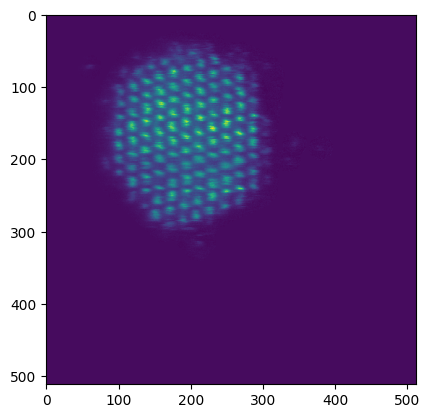

In [4]:
# %matplotlib qt
model.find_peaks()

Iteration 0: loss = 14.201571


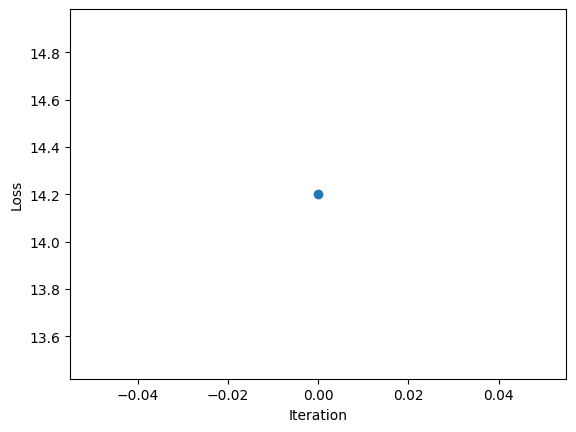

In [4]:
model.fit(lr=0.001,rel_tol=1e-5, max_iter=1)

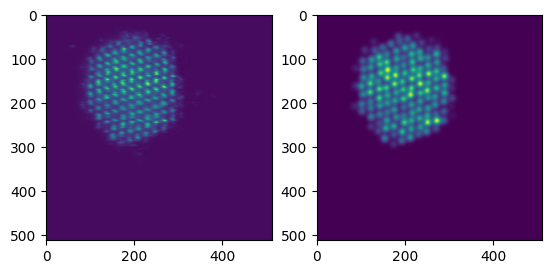

: 

In [5]:
plt.subplot(1,2,1)
plt.imshow(model.image)
plt.subplot(1,2,2)
plt.imshow(model.prediction)


In [13]:
model.same_width = False
model.device = 'cuda'
import torch.autograd.profiler as profiler
with profiler.profile(record_shapes=True, use_cuda=True) as prof:
    with profiler.record_function("Model Inference"):
        model.fit(lr=0.001,rel_tol=1e-5, max_iter=1000)

STAGE:2024-01-25 22:57:18 209220:209220 ActivityProfilerController.cpp:311] Completed Stage: Warm Up


Iteration 0: loss = 14.201571
Iteration 10: loss = 10.551659


STAGE:2024-01-25 22:57:27 209220:209220 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2024-01-25 22:57:27 209220:209220 ActivityProfilerController.cpp:321] Completed Stage: Post Processing


KeyboardInterrupt: 

In [9]:
print(prof)


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  --------------------------------------------------------------------------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls                                                                      Input Shapes  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  --------------------------------------------------------------------------------  
                                        Model Inference         1.74%     192.898ms        99.83%       11.058s       11.058s        4.435s        28.93%      

Text(0, 0.5, 'pyStatSTEM height')

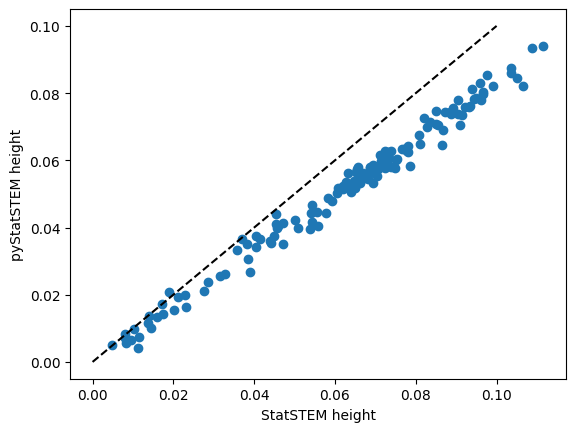

In [ ]:
plt.scatter(outputStatSTEM['eta'], model.height)
plt.plot([0,0.1],[0,0.1],'k--')
plt.xlabel('StatSTEM height')
plt.ylabel('pyStatSTEM height')


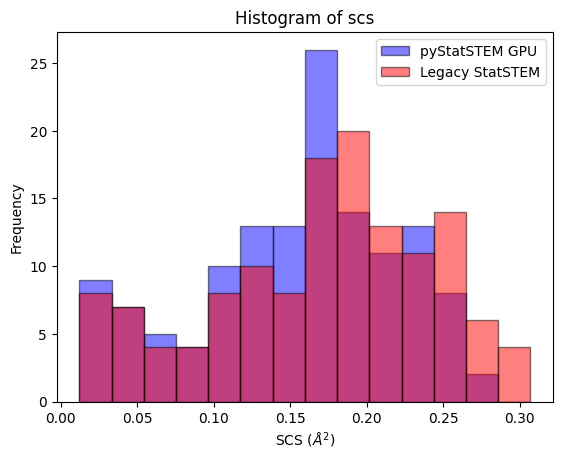

In [ ]:
data1= model.volume
data2= outputStatSTEM['volumes']
combined_data = np.concatenate((data1, data2))
min_bin = combined_data.min()
max_bin = combined_data.max()

# Define the bin edges so that both histograms will use the same bins
bins = np.linspace(min_bin, max_bin, 15)

plt.hist(data1, bins=bins, edgecolor='black',label='pyStatSTEM GPU',color='blue',alpha=0.5)
plt.hist(data2, bins=bins, edgecolor='black',color='red',alpha=0.5, label='Legacy StatSTEM')
plt.title('Histogram of scs')
plt.xlabel(r'SCS ($\AA^2$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
outputStatSTEM['model'] 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0.5, 1.0, 'Residuals')

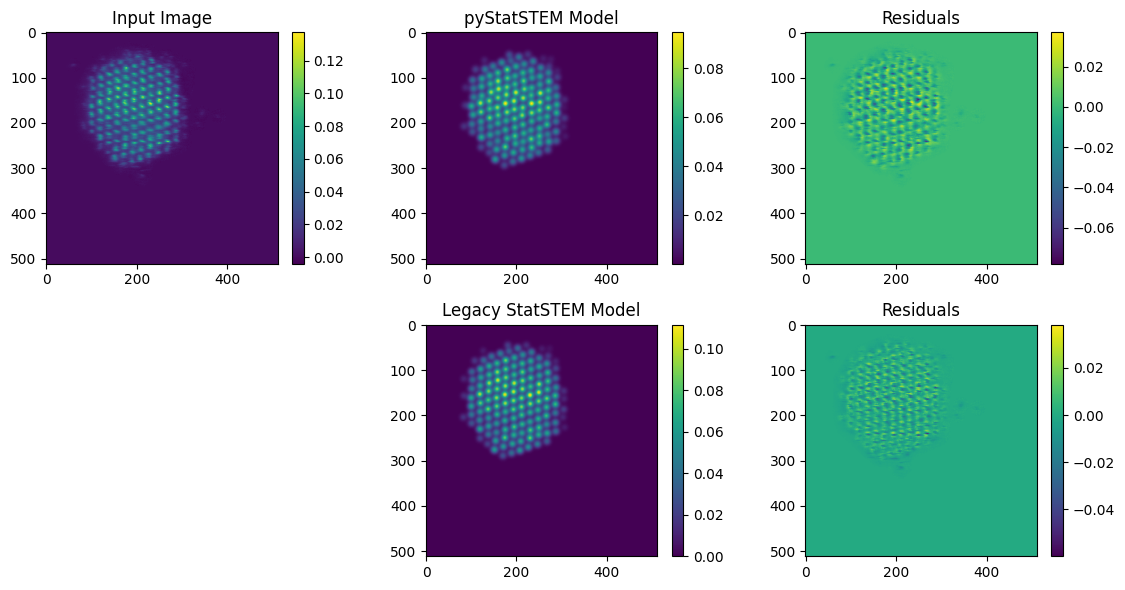

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')
plt.subplot(2,3,2)
im=plt.imshow(model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('pyStatSTEM Model')
plt.subplot(2,3,3)
im=plt.imshow(model.prediction-model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Residuals')


plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Legacy StatSTEM Model')
plt.subplot(2,3,6)
im=plt.imshow(outputStatSTEM['model']-model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Residuals')

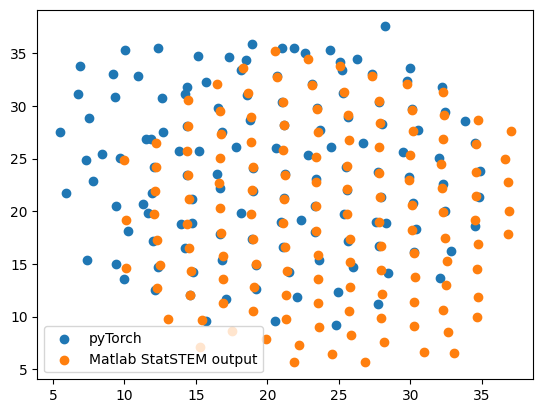

In [ ]:
plt.scatter(model.parameters[1].cpu().detach().numpy(),model.parameters[0].cpu().detach().numpy(),label='pyTorch') 
# plt.scatter(input_coordinates[:,0],input_coordinates[:,1],label='Matlab StatSTEM input')
plt.scatter(output_coordinates[:,0],output_coordinates[:,1],label='Matlab StatSTEM output')
# plt.scatter(f.coordinate[0][1]*dx,f.coordinate[0][0]*dx,label='pyStatSTEM')
plt.legend()

In [ ]:
model.background

Parameter containing:
tensor(0.0002, device='cuda:0', requires_grad=True)

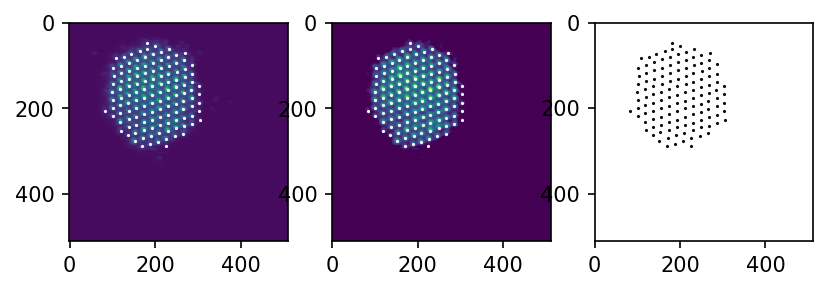

Optimization terminated successfully.
         Current function value: 0.000034
         Iterations: 56
         Function evaluations: 105


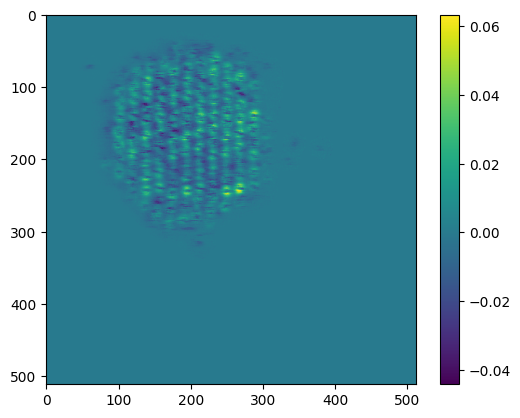

129
0 : mse= 2.3483474385597016e-05 , chage_rate= 0.3056272374448698
0.6671237089904025


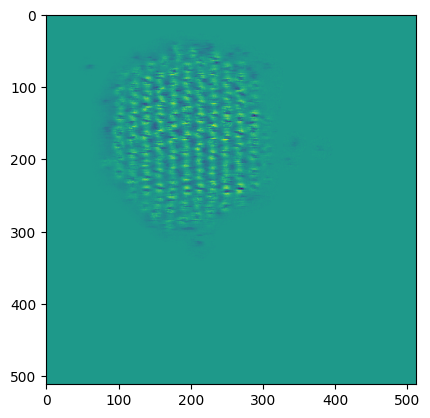

129
1 : mse= 2.3070447763836833e-05 , chage_rate= 0.01758796909598277
0.5860680019832216


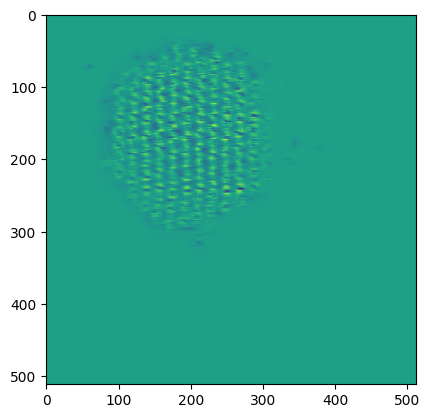

129
2 : mse= 2.3054706507229253e-05 , chage_rate= 0.0006823125744553159
0.5462157279835083


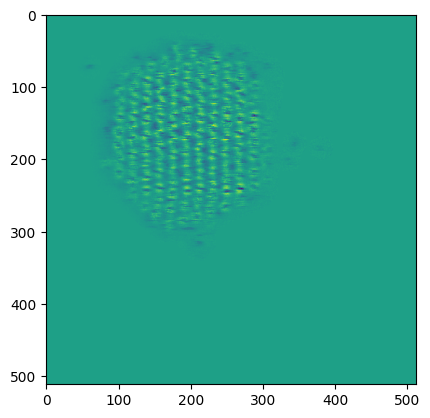

In [ ]:
from pyStatSTEM.classes import ImageProcess

f=ImageProcess(image)
f.find_peak(th_dist=15,th_inten=0.07)
f.fit_gaussian()

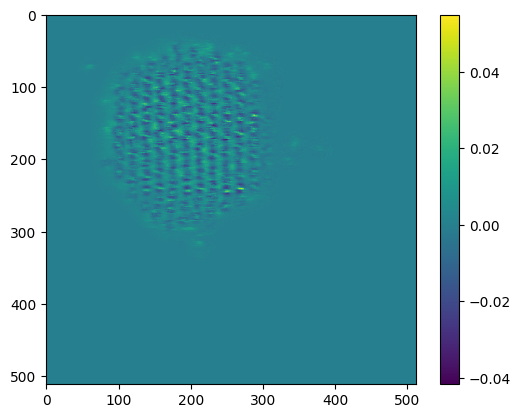

In [ ]:
plt.imshow(f.image[0]-f.image_fitted[0])
plt.colorbar()

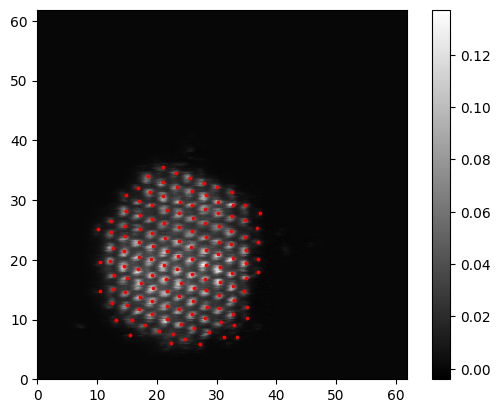

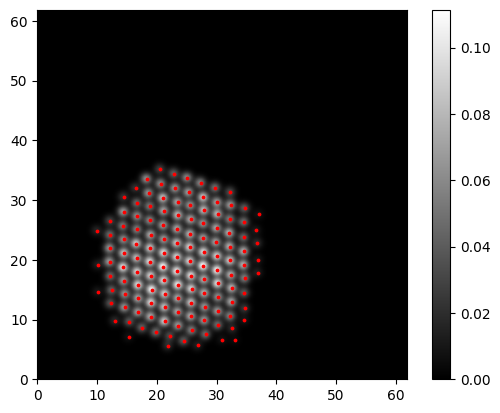

In [ ]:
import pyStatSTEM
import matplotlib.pyplot as plt
import numpy as np

legacyStatSTEM = pyStatSTEM.io.read_legacyInputStatSTEM('Example_PtIr.mat')
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']
# atomcountsStatSTEM = legacyStatSTEM['atomcounting'] # not used

fig = pyStatSTEM.utils.plot_image(inputStatSTEM['obs'], inputStatSTEM['Xaxis'], inputStatSTEM['Yaxis'])
plt.scatter(inputStatSTEM['coordinates'][:,0], inputStatSTEM['coordinates'][:,1], c='r', s=3)
plt.show()

fig2 = pyStatSTEM.utils.plot_image(outputStatSTEM['model'], inputStatSTEM['Xaxis'], inputStatSTEM['Yaxis'])
plt.scatter(outputStatSTEM['coordinates'][:,0], outputStatSTEM['coordinates'][:,1], c='r', s=3)
plt.show()

### Read generic image file formats into numpy arrays

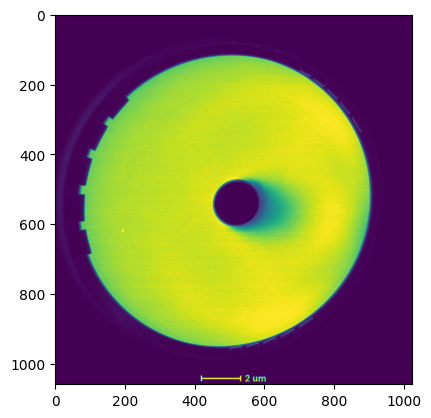

In [ ]:
img = pyStatSTEM.io.read_image('det.tif')
plt.imshow(img)
plt.show()

### Reading data from delimited text files

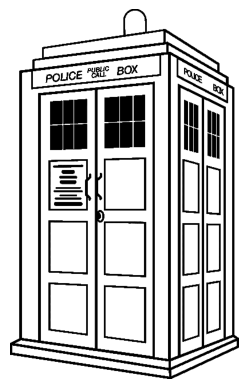

In [ ]:
img = pyStatSTEM.io.read_delimited_text('img.txt')
plt.imshow(-img, cmap='gray')
plt.axis('off')
plt.show()

### Testing preliminary class object instatiations


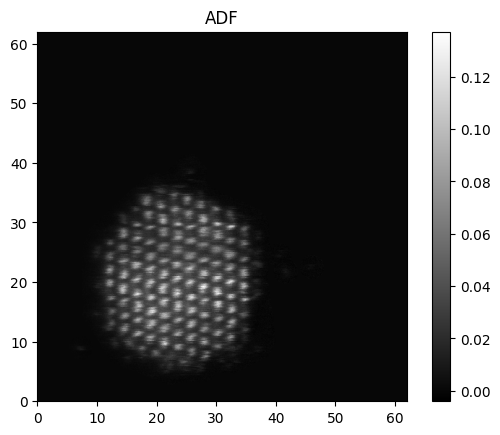

In [ ]:
# Create pyStatSTEM.Image object
im_adf = pyStatSTEM.Image(inputStatSTEM['obs'], 'ADF', inputStatSTEM['dx'])
im_adf.plot()


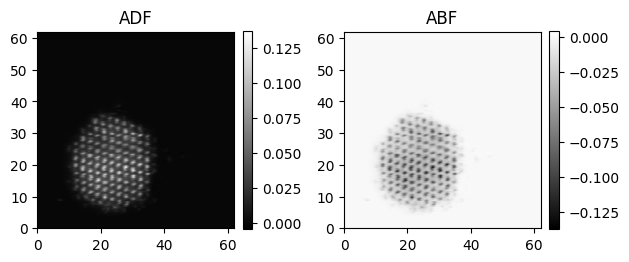

In [ ]:
from pyStatSTEM.preprocessing import invert_image

# Create new pyStatSTEM.Image object
im_abf = pyStatSTEM.Image(invert_image(inputStatSTEM['obs']),'ABF', inputStatSTEM['dx'])

# Create new pyStatSTEM.Experiment object
ex = pyStatSTEM.Experiment([im_adf, im_abf])
ex.plot()

In [ ]:
from tests import test_GMM
test_GMM.test_GMM(path_to_data="Example_PtIr.mat",plot=True)

ImportError: cannot import name 'test_GMM' from 'tests' (/home/zzhang/miniconda3/envs/hyperspy/lib/python3.10/site-packages/tests/__init__.py)